In [1]:
# Import necessary libraries
import pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# Define the file path
file_path = 'mutual_fund_data/df_merged.csv'

# Read the DataFrame from the CSV file
dtype_spec = {
    'crsp_obj_cd': 'string',
    'si_obj_cd': 'string',
    'wbrger_obj_cd': 'string',
    'policy': 'string',
    'lipper_asset_cd': 'string',
    'lipper_class': 'string',
    'lipper_obj_cd': 'string'
}
df_merged = pd.read_csv(file_path, dtype=dtype_spec)

# Display the first few rows of the DataFrame
df_merged

# Exclude rows where 'crsp_obj_cd' starts with 'I' or 'O'
excludes_i_o = ~df_merged['crsp_obj_cd'].str.startswith(('OM', 'OC', 'I'), na=False)

# Create a new DataFrame excluding the specified 'crsp_obj_cd' codes
df_merged = df_merged[excludes_i_o]
# df_merged = df_merged[df_merged['vanguard_VA'] > 10000]


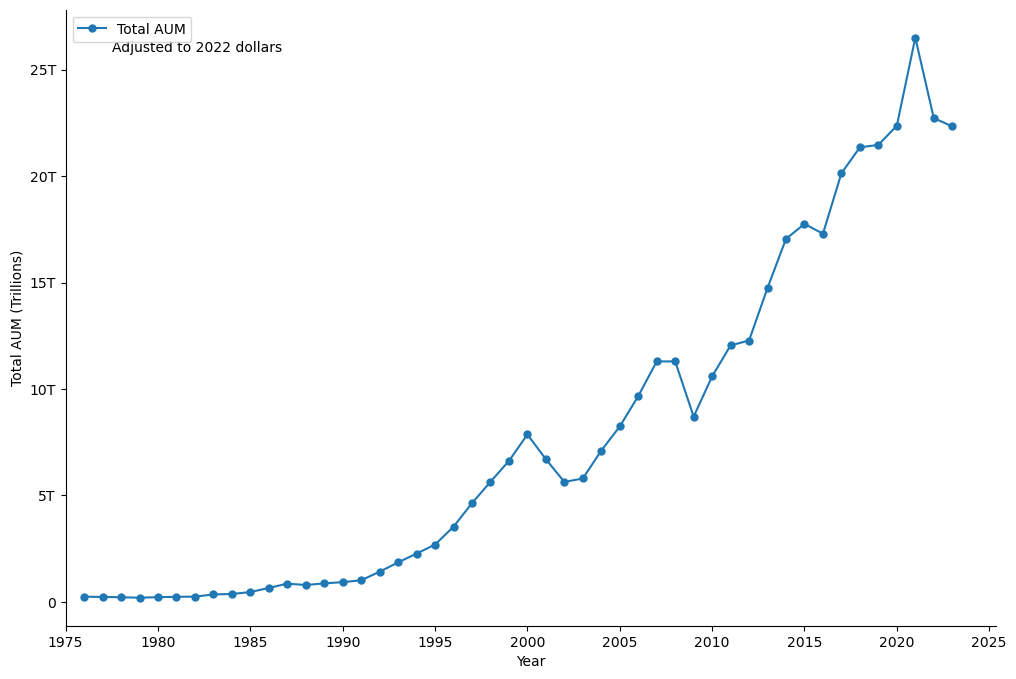

In [2]:
num_funds_each_year = df_merged.groupby('year')['crsp_fundno'].nunique()
mean_assets_per_fund = df_merged.groupby('year')['mtna_adj2022'].mean()
all_funds_FF_VA = df_merged.groupby('year')['ff_VA'].mean()
all_funds_vanguard_VA = df_merged.groupby('year')['vanguard_VA'].mean()
df_by_year = pd.DataFrame({
    'num_funds_each_year': num_funds_each_year,
    'mean_assets_per_fund': mean_assets_per_fund,
    'ff_monthly_mean_VA': all_funds_FF_VA,
    'vanguard_monthly_mean_VA': all_funds_vanguard_VA
}).reset_index()

df_by_year['total_aum_in_funds'] = df_by_year['num_funds_each_year'] * df_by_year['mean_assets_per_fund'] * 1000000
df_by_year['ff_VA_tot'] = df_by_year['ff_monthly_mean_VA'] * 12 * df_by_year['num_funds_each_year']
df_by_year['vanguard_VA_tot'] = df_by_year['vanguard_monthly_mean_VA'] * 12 * df_by_year['num_funds_each_year']

def billions(x, pos):
    if x == 0:
        return '0'
    return f'{x * 1e-9:.0f}B'  # convert to billions

def millions(x, pos):
    if x == 0:
        return '0'
    return f'{x * 1e-6:.0f}M'  # convert to millions

def trillions(x, pos):
    if x == 0:
        return '0'
    else:
        return f'{x * 1e-12:.0f}T'


# Create formatter
formatter = FuncFormatter(trillions)
plt.figure(figsize=(12, 8))
plt.plot(df_by_year['year'], df_by_year['total_aum_in_funds'], marker='o', markersize=5, label="Total AUM")

plt.xlabel('Year')
plt.ylabel('Total AUM (Trillions)')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/total_aum_in_funds.pdf')
plt.show()

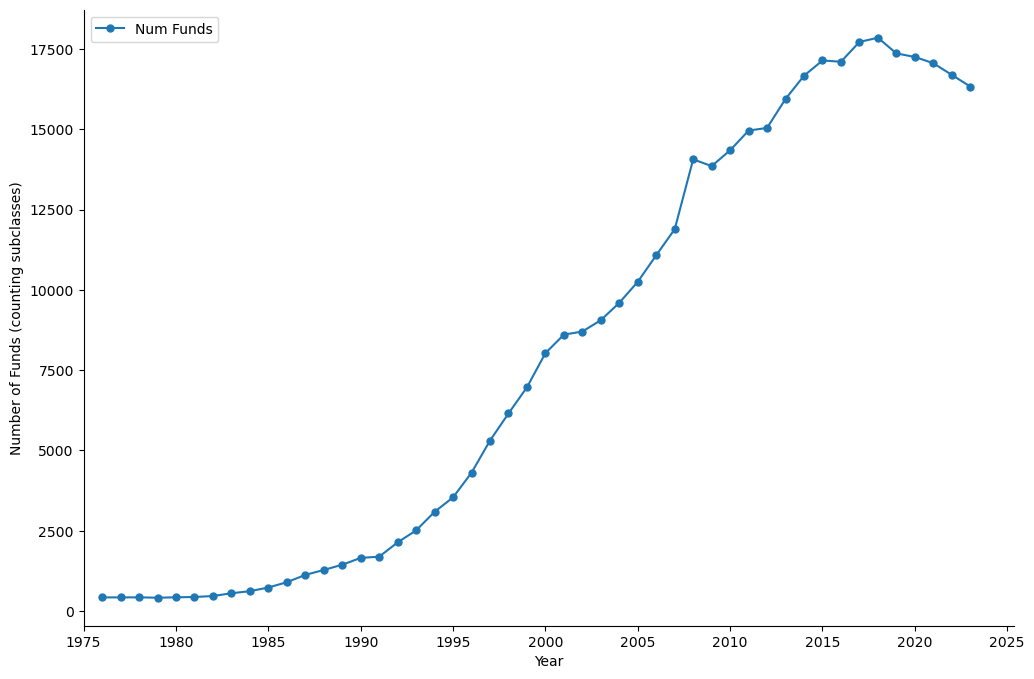

In [3]:
formatter = FuncFormatter(trillions)
plt.figure(figsize=(12, 8))
plt.plot(df_by_year['year'], df_by_year['num_funds_each_year'], marker='o', markersize=5, label="Num Funds")

plt.xlabel('Year')
plt.ylabel('Number of Funds (counting subclasses)')
ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/num_funds_by_year.pdf')
plt.show()

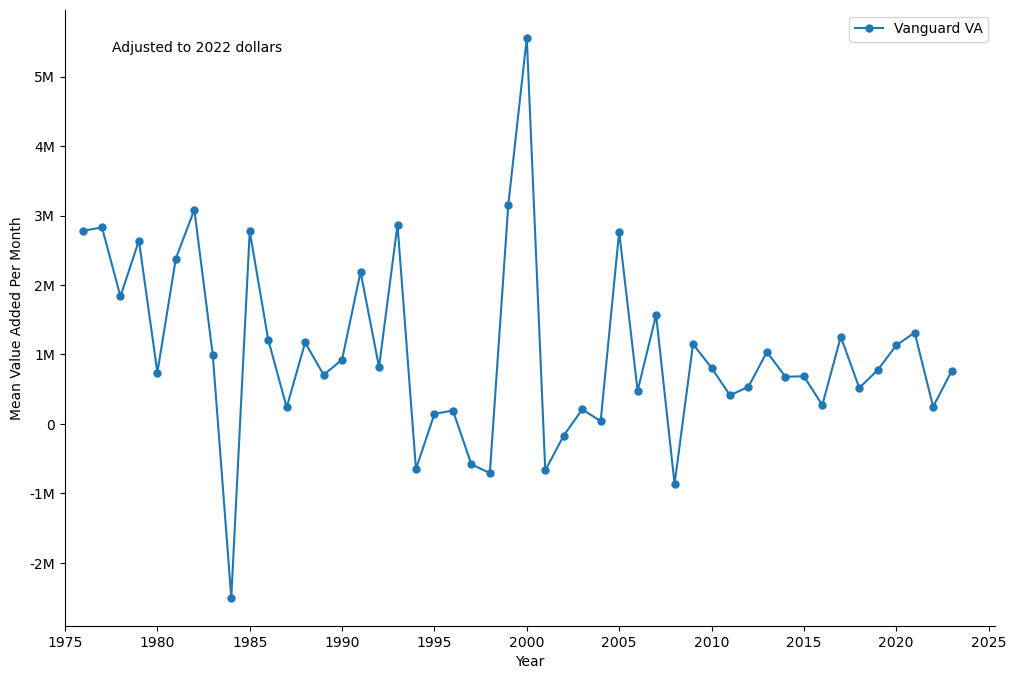

In [4]:
# Create formatter
formatter = FuncFormatter(millions)
plt.figure(figsize=(12, 8))
# plt.plot(df_by_year['year'], df_by_year['total_aum_in_funds'], marker='o', markersize=5, label="Total AUM")
# plt.plot(df_by_year['year'], df_by_year['ff_VA_tot'], marker='o', markersize=5, label="FF_VA")
plt.plot(df_by_year['year'], df_by_year['vanguard_monthly_mean_VA'], marker='o', markersize=5, label="Vanguard VA")
# plt.plot(df_by_year['year'], df_by_year['num_funds_each_year'], marker='o', markersize=5, label="Num Funds")

plt.xlabel('Year')
plt.ylabel('Mean Value Added Per Month')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/mean_vanguard_VA_all_funds.pdf')
plt.show()

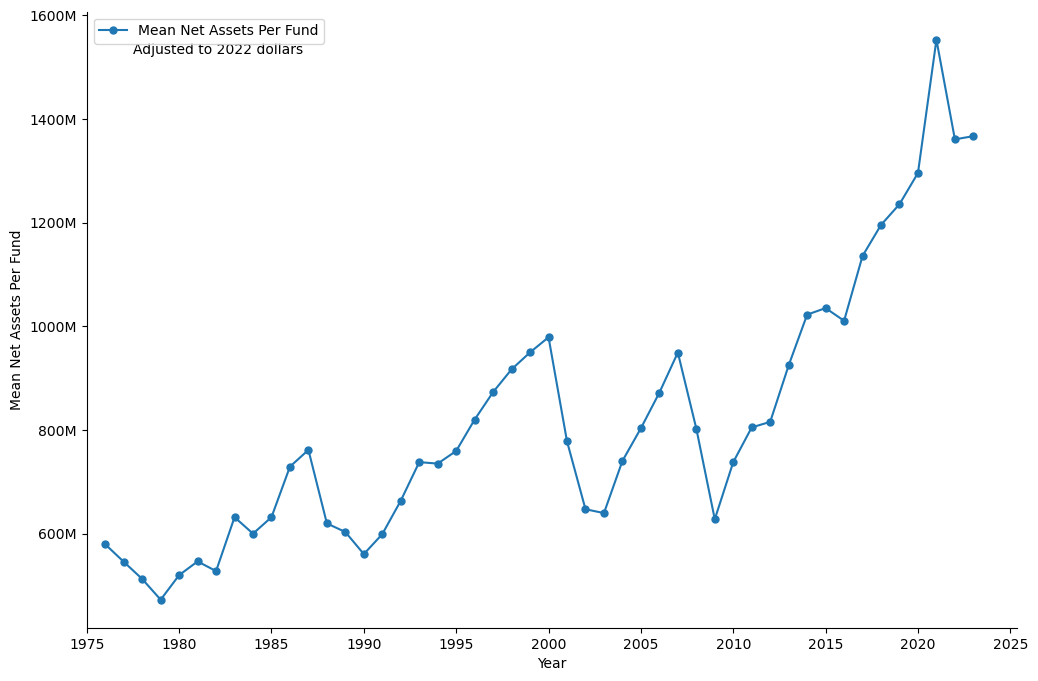

In [5]:
# Create formatter
formatter = FuncFormatter(millions)
plt.figure(figsize=(12, 8))
# plt.plot(df_by_year['year'], df_by_year['total_aum_in_funds'], marker='o', markersize=5, label="Total AUM")
# plt.plot(df_by_year['year'], df_by_year['ff_VA_tot'], marker='o', markersize=5, label="FF_VA")
plt.plot(df_by_year['year'], df_by_year['mean_assets_per_fund']*1000000, marker='o', markersize=5, label="Mean Net Assets Per Fund")
# plt.plot(df_by_year['year'], df_by_year['num_funds_each_year'], marker='o', markersize=5, label="Num Funds")

plt.xlabel('Year')
plt.ylabel('Mean Net Assets Per Fund')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/mean_net_assets_per_year_all_funds.pdf')
plt.show()

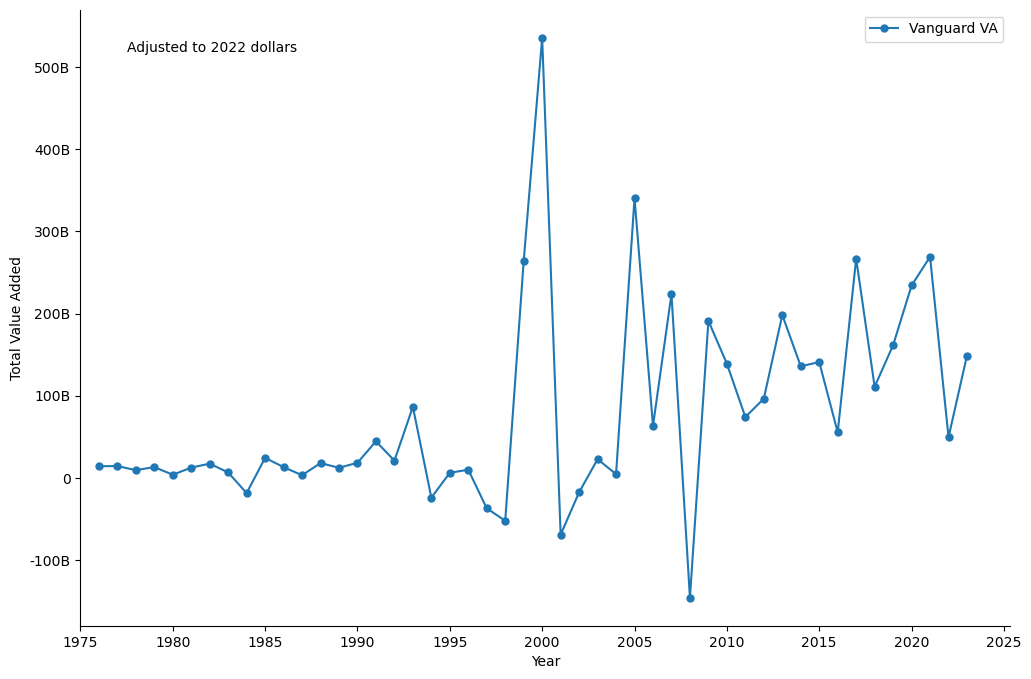

In [6]:
# Create formatter
formatter = FuncFormatter(billions)
plt.figure(figsize=(12, 8))
plt.plot(df_by_year['year'], df_by_year['vanguard_VA_tot'], marker='o', markersize=5, label="Vanguard VA")


plt.xlabel('Year')
plt.ylabel('Total Value Added')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/vanguard_VA_all_funds.pdf')
plt.show()

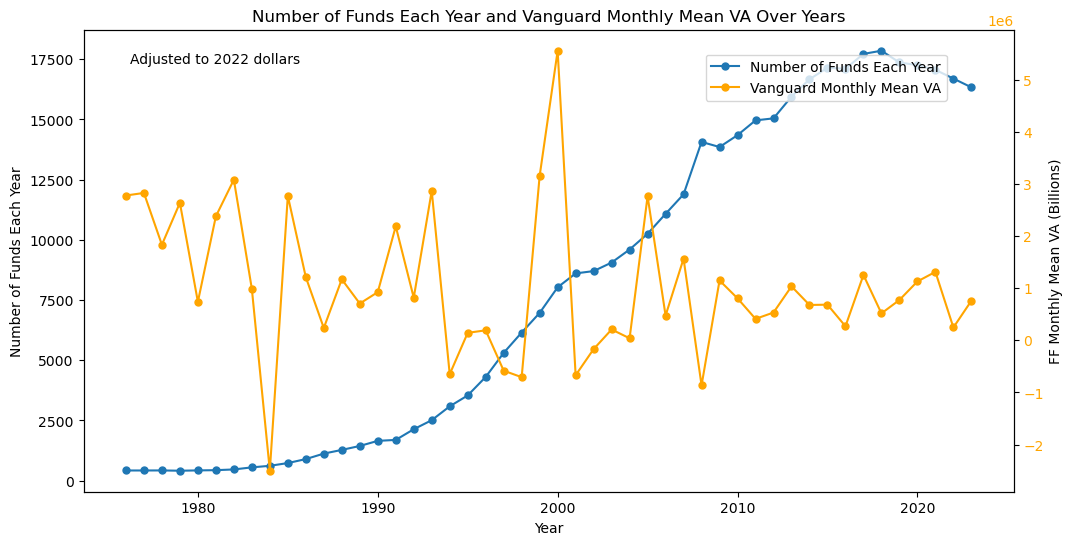

In [7]:
plt.close()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first series on ax1
ax1.plot(df_by_year['year'], df_by_year['num_funds_each_year'], marker='o', markersize=5, label='Number of Funds Each Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Funds Each Year')
ax1.tick_params(axis='y')
# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(df_by_year['year'], df_by_year['vanguard_monthly_mean_VA'], marker='o', markersize=5, color='orange', label='Vanguard Monthly Mean VA')
ax2.set_ylabel('FF Monthly Mean VA (Billions)')
ax2.tick_params(axis='y', labelcolor='orange')

# Add additional text
fig.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=ax1.transAxes,
         fontsize=10, verticalalignment='top', bbox=None) 

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(0.85,0.85))
# Display the plot
plt.title('Number of Funds Each Year and Vanguard Monthly Mean VA Over Years')
plt.savefig('figures/vanguard_VA_mean_num_funds.pdf')
plt.show()

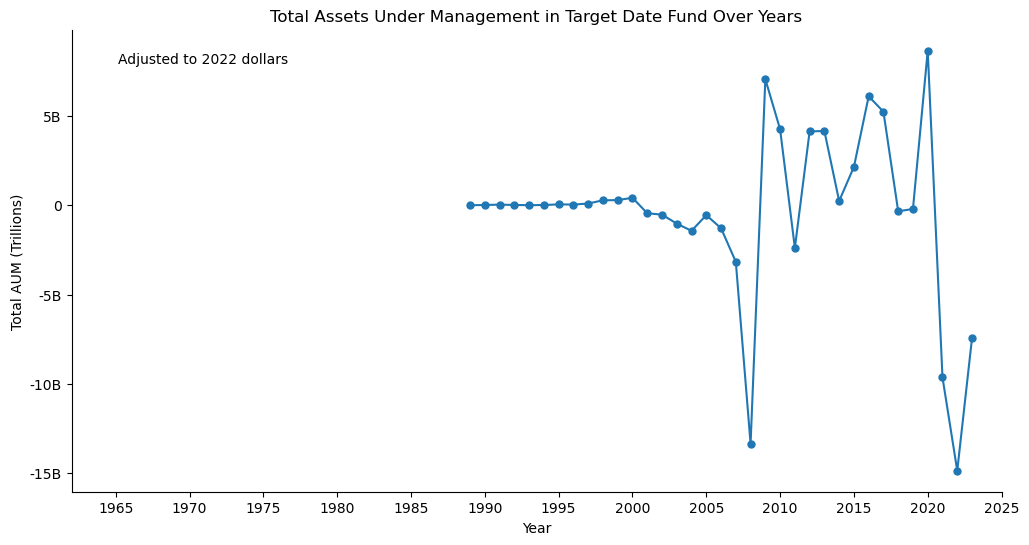

In [8]:
# Regex to match fund names with the word "target", a year between 1965 and 2099, or "retirement"
target_date_regex = r'\b(?:19[6-9]\d|20[0-9]{2})\b|\btarget\b|\bretirement\b'

# Regex to exclude fund names with the word "russell"
exclude_russell_regex = r'\brussell\b'

# Filter conditions
is_target_or_year = df_merged['fund_name'].str.contains(target_date_regex, na=False, regex=True)
is_crsp_obj_cd_mt = df_merged['crsp_obj_cd'] == 'MT'
excludes_russell = ~df_merged['fund_name'].str.contains(exclude_russell_regex, na=False, case=False, regex=True)
excludes_cd = ~df_merged['crsp_obj_cd'].str.startswith(('IG', 'IU', 'IF', 'IC', 'IUS', 'IUI'), na=False)

# Combine conditions
target_date_funds = df_merged[(is_target_or_year | is_crsp_obj_cd_mt) & excludes_russell & excludes_cd]
td_funds_each_year = target_date_funds.groupby('year')['crsp_fundno'].nunique()
td_funds_FF_VA = target_date_funds.groupby('year')['ff_VA'].mean()
td_funds_Vanguard_VA = target_date_funds.groupby('year')['vanguard_VA'].mean()

mean_assets_per_td = target_date_funds.groupby('year')['mtna_adj2022'].mean()
td_by_year = pd.DataFrame({
    'td_funds_each_year': td_funds_each_year,
    'mean_assets_per_fund': mean_assets_per_td,
    'ff_monthly_mean_VA': td_funds_FF_VA,
    'vanguard_monthly_mean_VA': td_funds_Vanguard_VA
}).reset_index()
td_by_year['total_aum_in_funds'] = td_by_year['td_funds_each_year'] * td_by_year['mean_assets_per_fund'] * 1000000
td_by_year['ff_VA_tot'] = td_by_year['ff_monthly_mean_VA'] * 12 * td_by_year['td_funds_each_year']
td_by_year['vanguard_VA_tot'] = td_by_year['vanguard_monthly_mean_VA'] * 12 * td_by_year['td_funds_each_year']
formatter = FuncFormatter(billions)

plt.figure(figsize=(12, 6))
# plt.plot(td_by_year['year'], td_by_year['total_aum_in_funds'], marker='o', markersize=5)
plt.plot(td_by_year['year'], td_by_year['vanguard_VA_tot'], marker='o', markersize=5)
plt.title('Total Assets Under Management in Target Date Fund Over Years')
plt.xlabel('Year')
plt.ylabel('Total AUM (Trillions)')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=0)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1962)
plt.grid(False)

plt.savefig('figures/total_aum_in_tds.pdf')
plt.show()

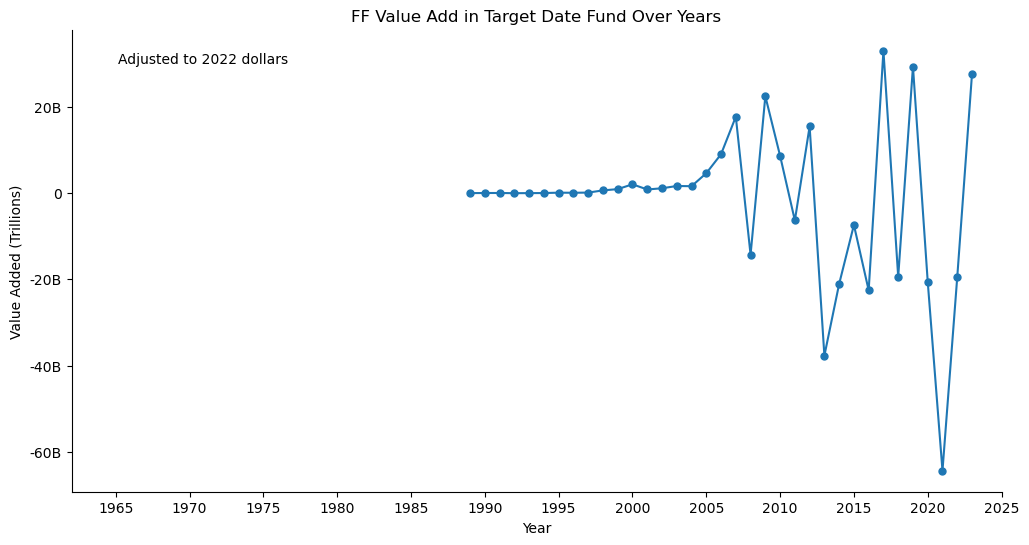

In [9]:
plt.close()
plt.figure(figsize=(12, 6))
plt.plot(td_by_year['year'], td_by_year['ff_VA_tot'], marker='o', markersize=5)
plt.title('FF Value Add in Target Date Fund Over Years')
plt.xlabel('Year')
plt.ylabel('Value Added (Trillions)')
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
formatter = FuncFormatter(billions)
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1962)
plt.grid(False)

plt.savefig('figures/vanguard_va_in_tds.pdf')
plt.show()

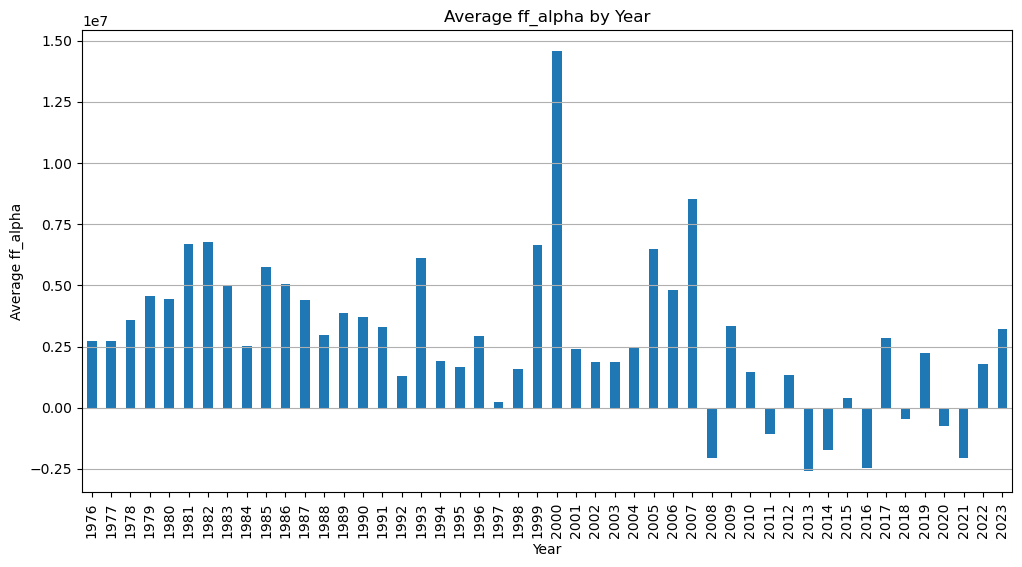

In [10]:
mean_ff_alpha_by_year = df_merged.groupby('year')['ff_VA'].mean()

# Plot the result in a bar chart
plt.figure(figsize=(12, 6))
mean_ff_alpha_by_year.plot(kind='bar')
plt.title('Average ff_alpha by Year')
plt.xlabel('Year')
plt.ylabel('Average ff_alpha')
plt.grid(axis='y')
plt.show()

In [11]:
df_merged['year_month'] = pd.to_datetime(df_merged[['year', 'month']].assign(day=1))

def check_missing_periods(group):
    # Generate a range of all months between the first and last entry
    all_months = pd.date_range(start=group['year_month'].min(), end=group['year_month'].max(), freq='MS')
    # Check the missing months
    missing_months = all_months.difference(group['year_month'])
    return missing_months

# Apply the function to each group and collect the results
missing_periods = df_merged.groupby('crsp_fundno').apply(check_missing_periods)

# Display the missing periods for each crsp_fundno
for fund, missing in missing_periods.items():
    if len(missing) > 0:
        print(f"Fund {fund} is missing the following periods:\n{missing}")
    else:
        print(f"Fund {fund} has no missing periods.")

Fund 1 has no missing periods.
Fund 2 has no missing periods.
Fund 4 has no missing periods.
Fund 7 has no missing periods.
Fund 8 is missing the following periods:
DatetimeIndex(['1995-04-01'], dtype='datetime64[ns]', freq=None)
Fund 9 is missing the following periods:
DatetimeIndex(['1989-07-01', '1990-01-01'], dtype='datetime64[ns]', freq=None)
Fund 11 has no missing periods.
Fund 12 has no missing periods.
Fund 15 is missing the following periods:
DatetimeIndex(['1995-08-01'], dtype='datetime64[ns]', freq=None)
Fund 16 is missing the following periods:
DatetimeIndex(['1995-08-01'], dtype='datetime64[ns]', freq=None)
Fund 17 has no missing periods.
Fund 23 is missing the following periods:
DatetimeIndex(['1994-09-01'], dtype='datetime64[ns]', freq=None)
Fund 24 has no missing periods.
Fund 25 is missing the following periods:
DatetimeIndex(['1994-07-01', '1994-11-01'], dtype='datetime64[ns]', freq=None)
Fund 31 has no missing periods.
Fund 32 has no missing periods.
Fund 33 is missi

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [12]:
df_merged[df_merged['crsp_fundno'] == 5]

Empty DataFrame
Columns: [crsp_fundno, caldt, mret, mtna, exp_ratio, turn_ratio, fund_name, cma, hml, mktrf, umd, rmw, crsp_obj_cd, si_obj_cd, wbrger_obj_cd, policy, lipper_asset_cd, lipper_class, lipper_obj_cd, index_fund_flag, month, year, 5year, gross_return, cpiind, mtna_adj2022, main_fund, subclass, VFINX, VEXMX, NAESX, VEURX, VPACX, VBINX, VIVAX, VEIEX, VIMSX, VISGX, VISVX, QQQ, VTMGX, VGSLX, VFINX_v, VEXMX_v, NAESX_v, VEURX_v, VPACX_v, VBINX_v, VIVAX_v, VEIEX_v, VIMSX_v, VISGX_v, VISVX_v, QQQ_v, VTMGX_v, VGSLX_v, group_size, nobs, hml_ff, umd_ff, rmw_ff, mktrf_ff, cma_ff, vanguard_return, vanguard_alpha, vanguard_VA, ff_return, ff_alpha, ff_VA, year_month]
Index: []

[0 rows x 70 columns]

In [13]:
df_merged

crsp_fundno       caldt      mret     mtna  exp_ratio  turn_ratio  \
0                  1  1997-03-31 -0.011789   12.081     0.0019         NaN   
1                  1  1997-04-30  0.008417   20.540     0.0019         NaN   
2                  1  1997-05-30  0.013523   26.157     0.0019         NaN   
3                  1  1997-06-30  0.012502   34.609     0.0019         NaN   
4                  1  1997-07-31  0.029325   42.490     0.0019         NaN   
...              ...         ...       ...      ...        ...         ...   
4146331       102020  2023-12-29  0.045287   67.600     0.0000         NaN   
4146332       102075  2023-10-31 -0.034047  290.200     0.0000         NaN   
4146333       102075  2023-11-30  0.081779  290.200     0.0000         NaN   
4146334       102121  2023-11-30  0.074257   22.600     0.0000         NaN   
4146335       102121  2023-12-29  0.046925   22.600     0.0000         NaN   

                                                 fund_name     cma     hml  \
0                           AARP Income Tr:Bond for Income  0.0166  0.0339   
1                           AARP Income Tr:Bond for Income -0.0072  0.0007   
2                           AARP Income Tr:Bond for Income -0.0296 -0.0413   
3                           AARP Income Tr:Bond for Income  0.0066  0.0158   
4                           AARP Income Tr:Bond for Income -0.0258  0.0026   
...                                                    ...     ...     ...   
4146331  Vanguard Whitehall Funds: Vanguard Internation...  0.0136  0.0493   
4146332  Transamerica Funds: Transamerica Long Credit; ... -0.0063  0.0017   
4146333  Transamerica Funds: Transamerica Long Credit; ... -0.0104  0.0161   
4146334  State Street Institutional Investment Trust: S... -0.0104  0.0161   
4146335  State Street Institutional Investment Trust: S...  0.0136  0.0493   

          mktrf  ...  rmw_ff  mktrf_ff cma_ff vanguard_return vanguard_alpha  \
0       -0.0503  ...     NaN       NaN    NaN             NaN            NaN   
1        0.0404  ...     NaN       NaN    NaN             NaN            NaN   
2        0.0674  ...     NaN       NaN    NaN             NaN            NaN   
3        0.0410  ...     NaN       NaN    NaN             NaN            NaN   
4        0.0733  ...     NaN       NaN    NaN             NaN            NaN   
...         ...  ...     ...       ...    ...             ...            ...   
4146331  0.0487  ...     NaN       NaN    NaN             NaN            NaN   
4146332 -0.0318  ...     NaN       NaN    NaN             NaN            NaN   
4146333  0.0884  ...     NaN       NaN    NaN             NaN            NaN   
4146334  0.0884  ...     NaN       NaN    NaN             NaN            NaN   
4146335  0.0487  ...     NaN       NaN    NaN             NaN            NaN   

        vanguard_VA ff_return ff_alpha ff_VA year_month  
0               NaN       NaN      NaN   NaN 1997-03-01  
1               NaN       NaN      NaN   NaN 1997-04-01  
2               NaN       NaN      NaN   NaN 1997-05-01  
3               NaN       NaN      NaN   NaN 1997-06-01  
4               NaN       NaN      NaN   NaN 1997-07-01  
...             ...       ...      ...   ...        ...  
4146331         NaN       NaN      NaN   NaN 2023-12-01  
4146332         NaN       NaN      NaN   NaN 2023-10-01  
4146333         NaN       NaN      NaN   NaN 2023-11-01  
4146334         NaN       NaN      NaN   NaN 2023-11-01  
4146335         NaN       NaN      NaN   NaN 2023-12-01  

[4146336 rows x 70 columns]

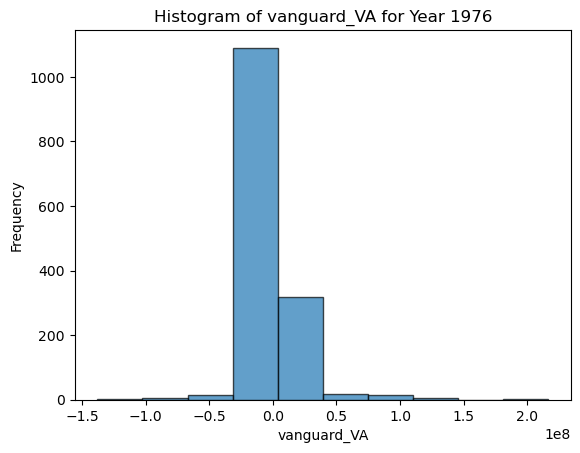

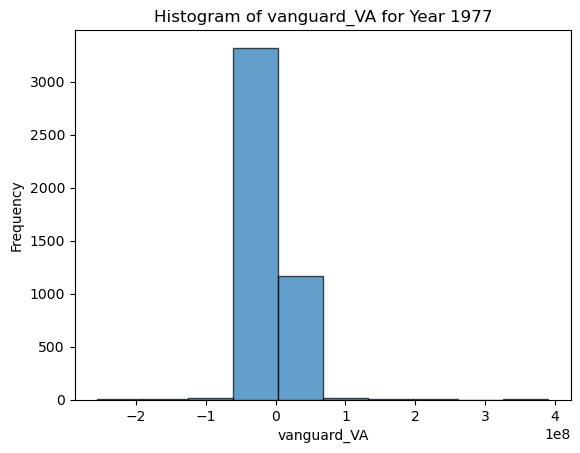

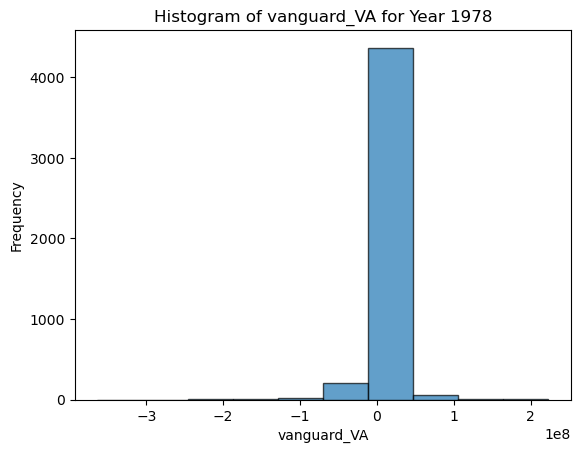

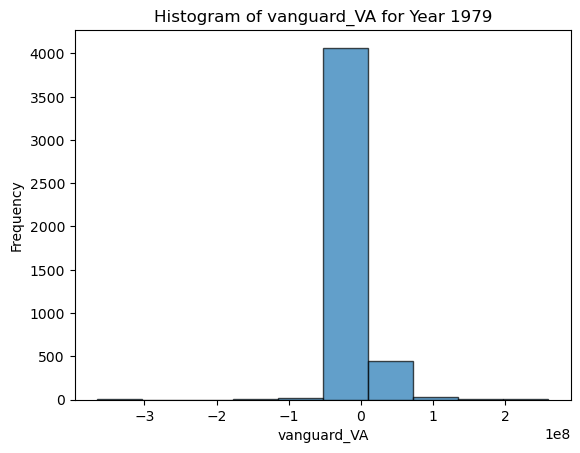

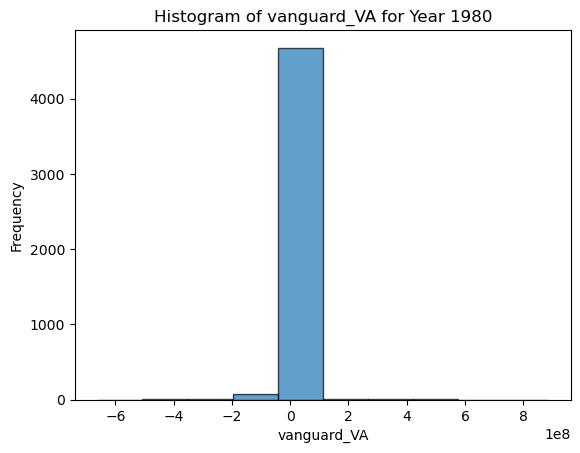

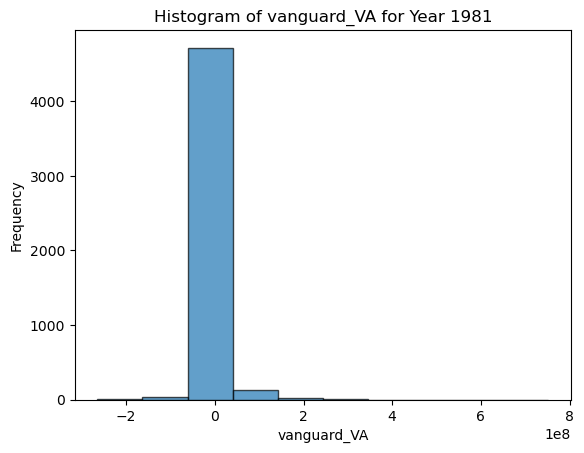

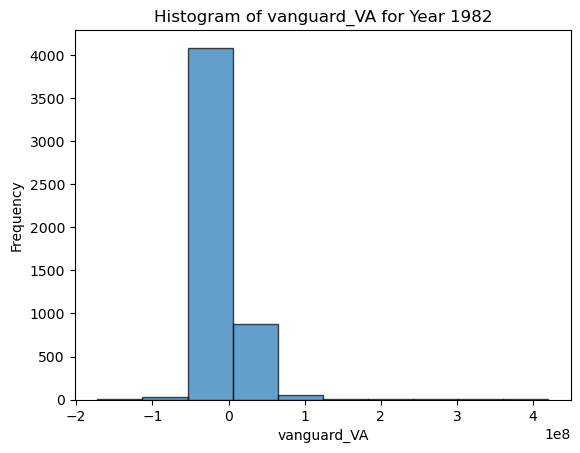

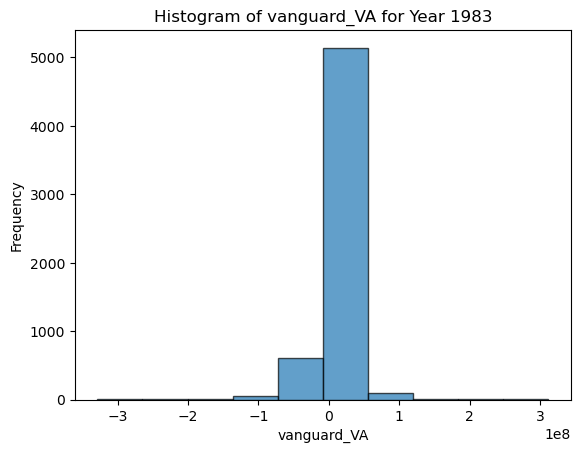

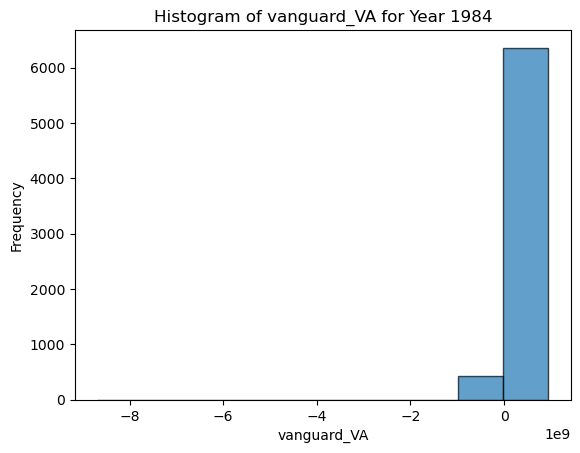

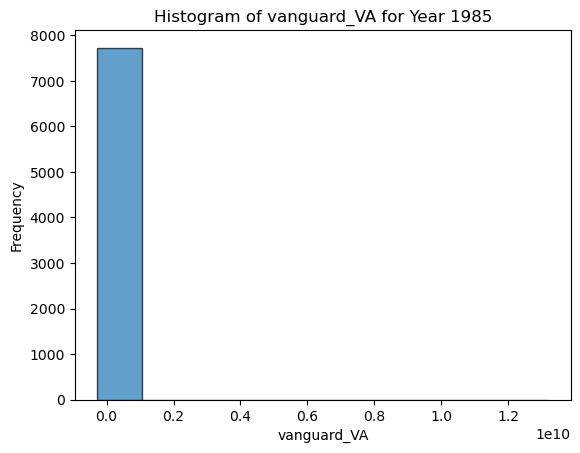

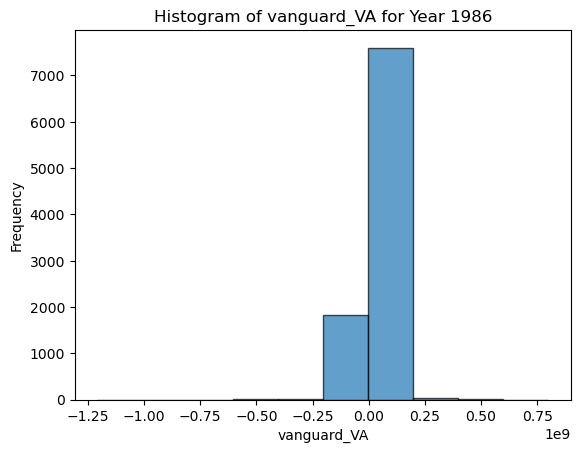

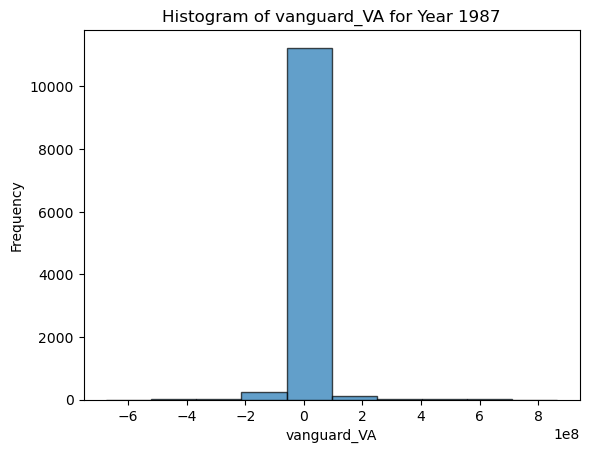

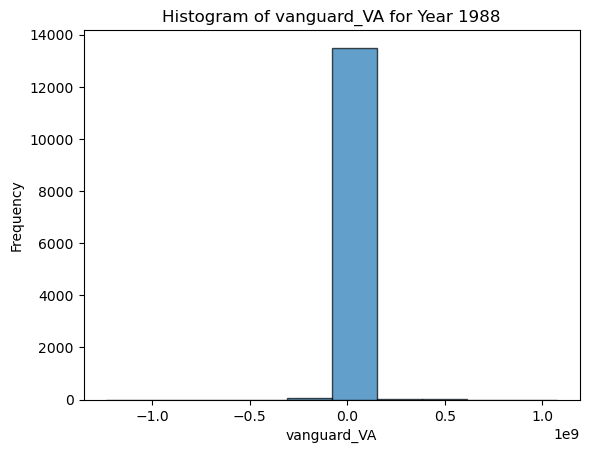

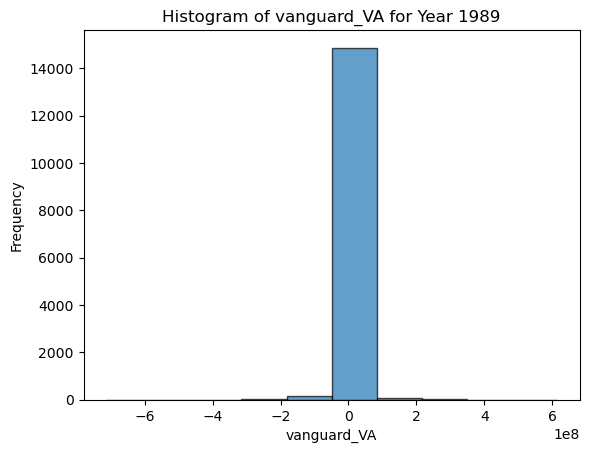

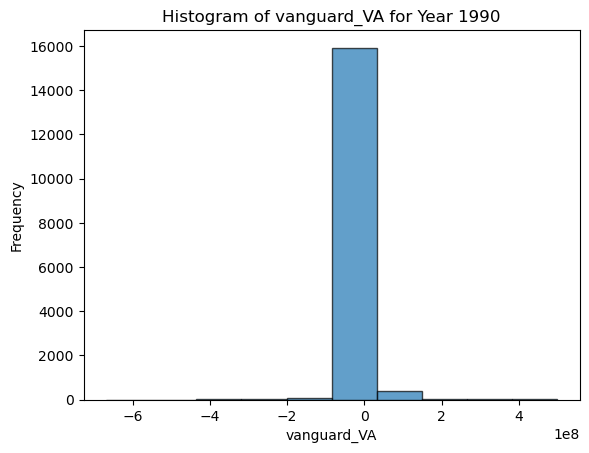

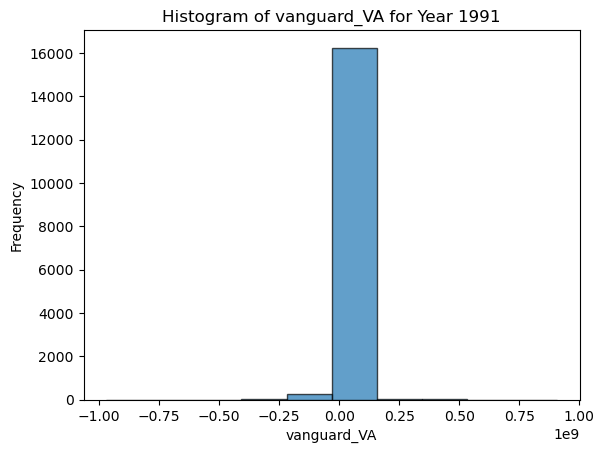

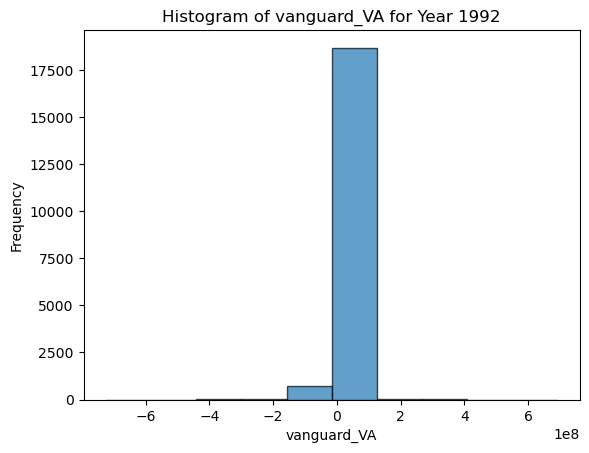

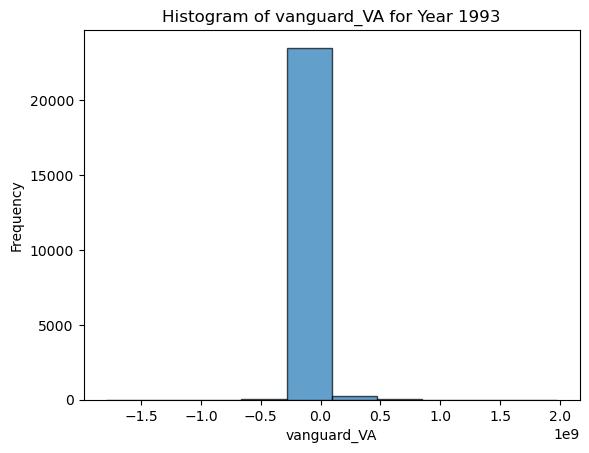

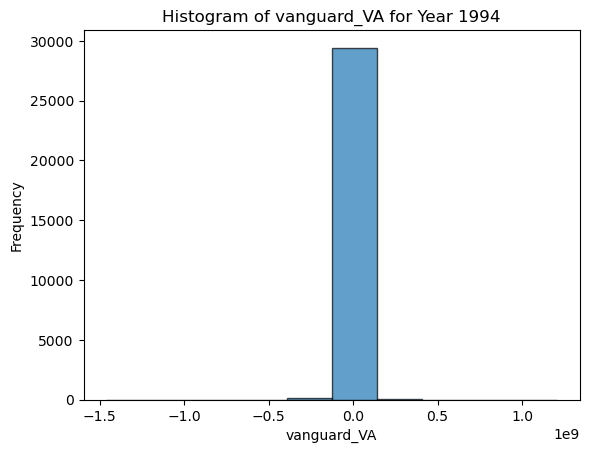

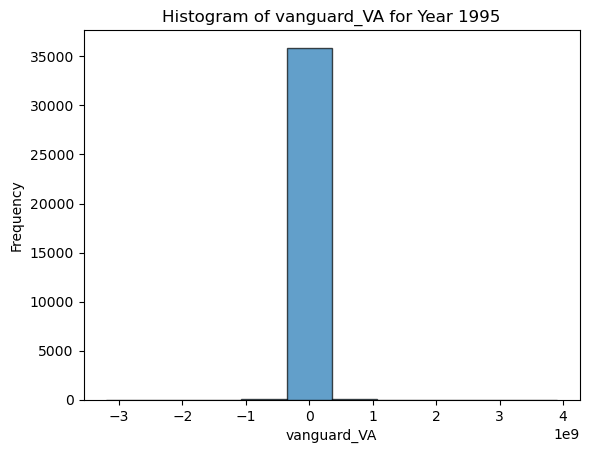

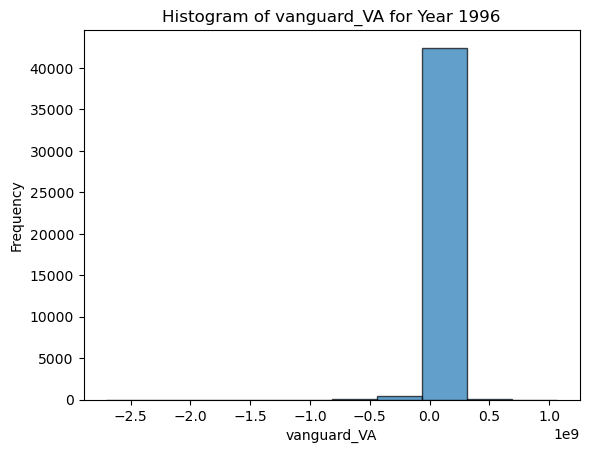

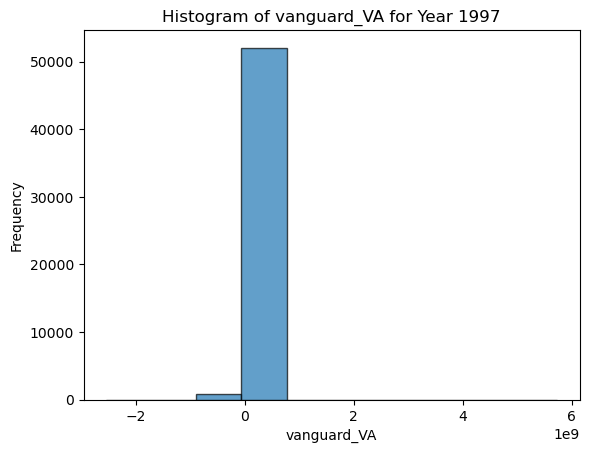

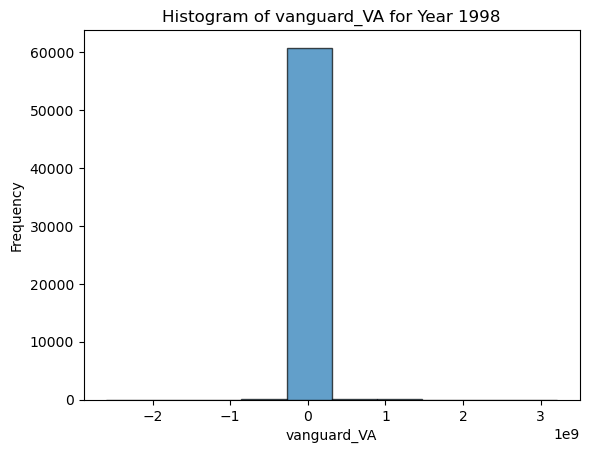

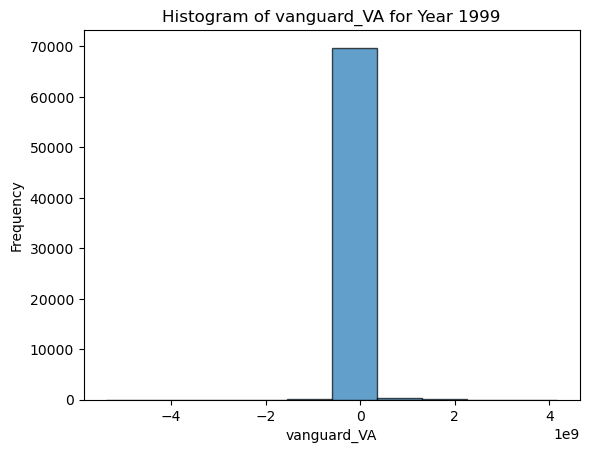

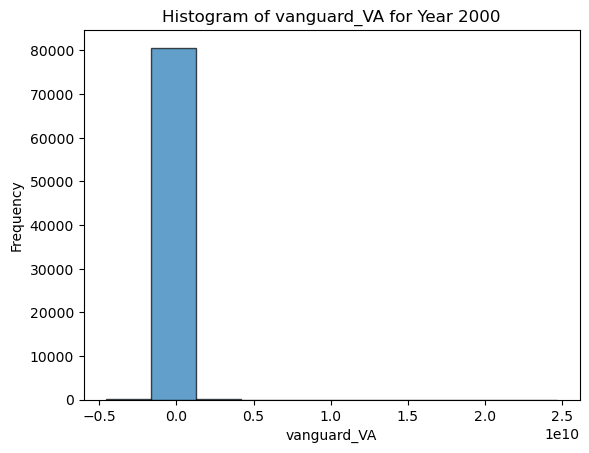

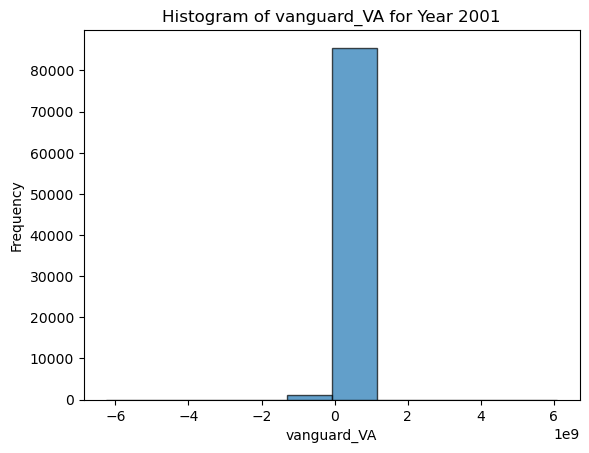

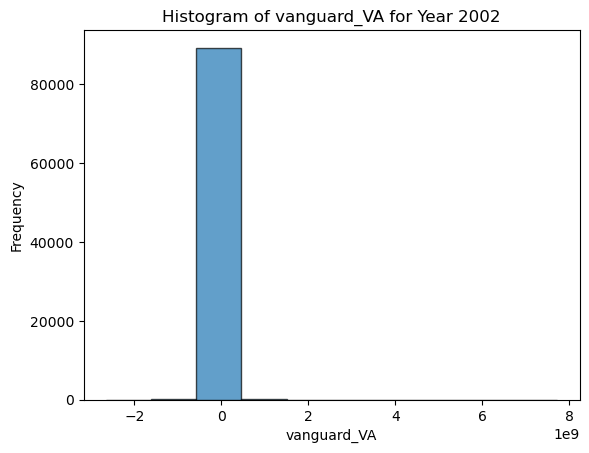

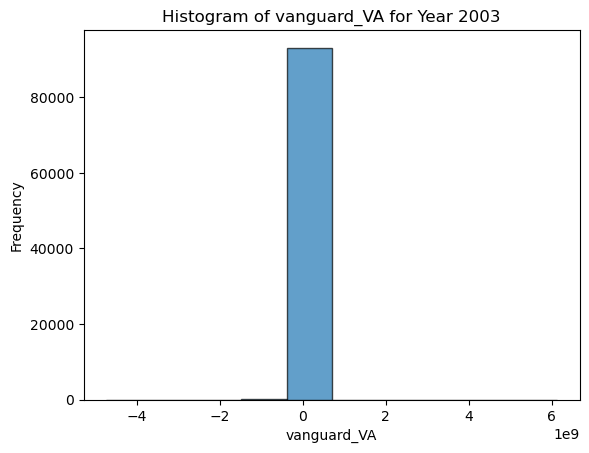

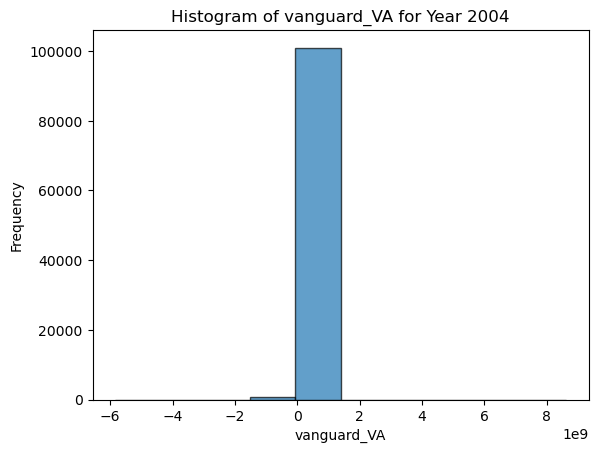

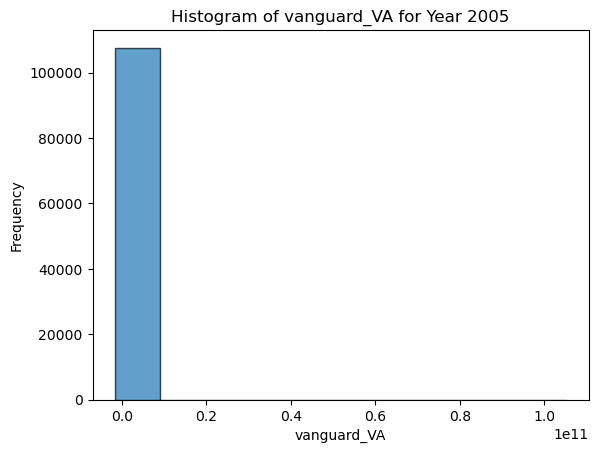

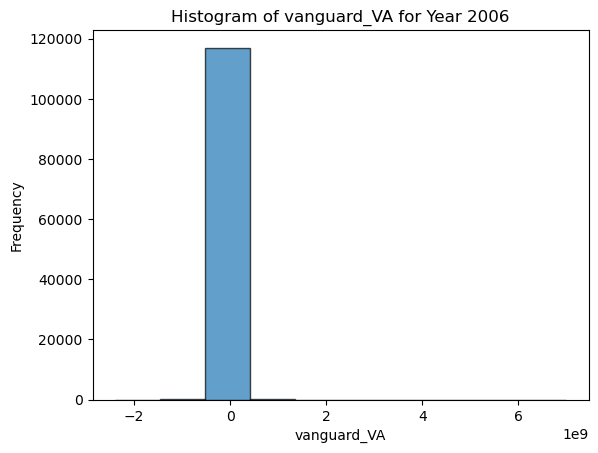

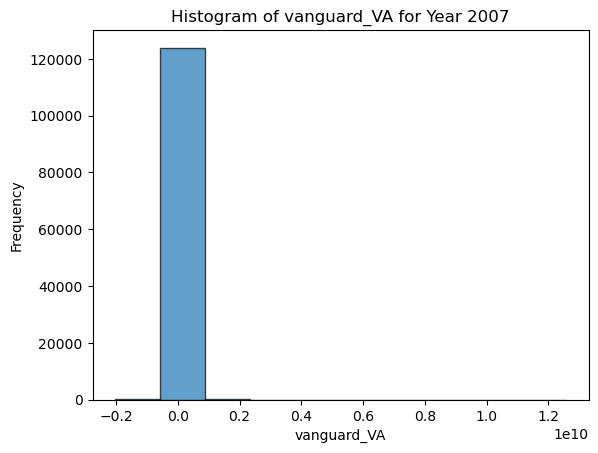

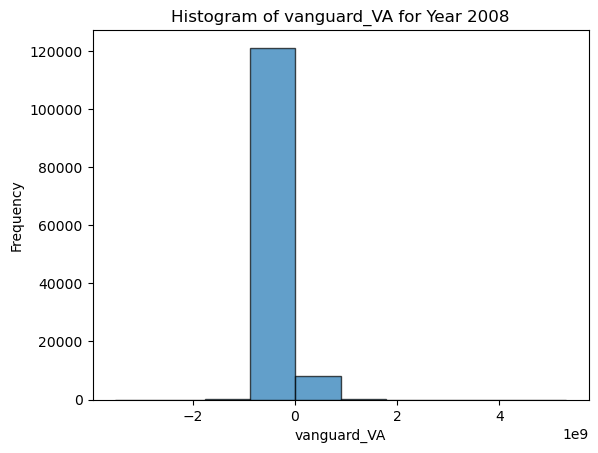

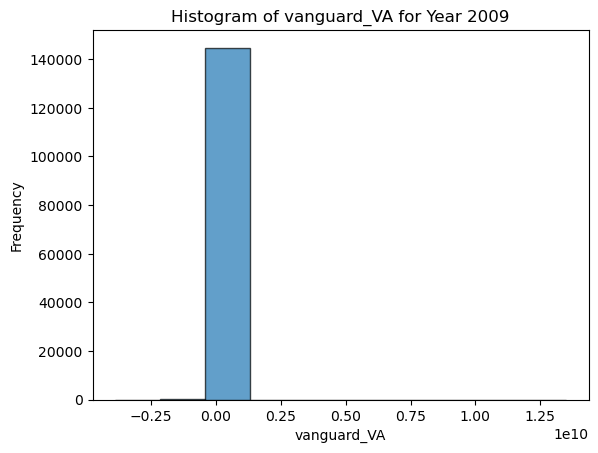

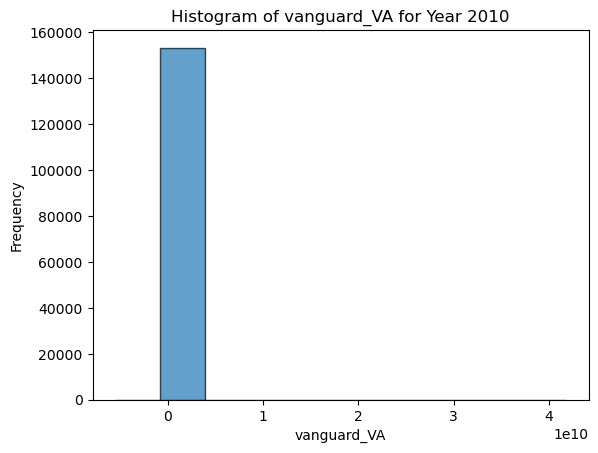

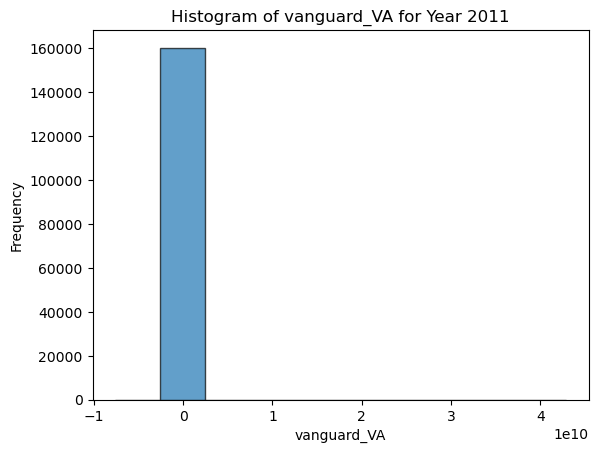

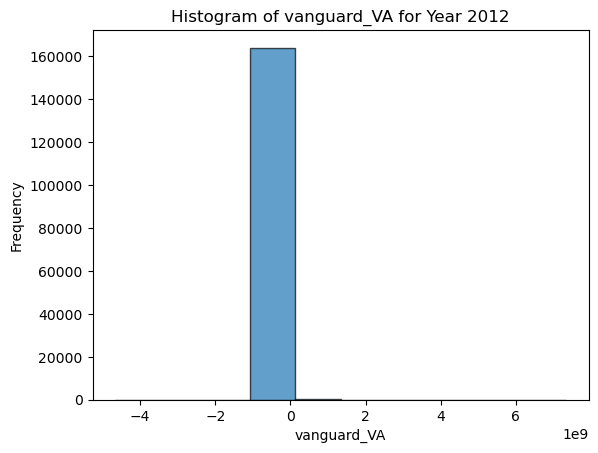

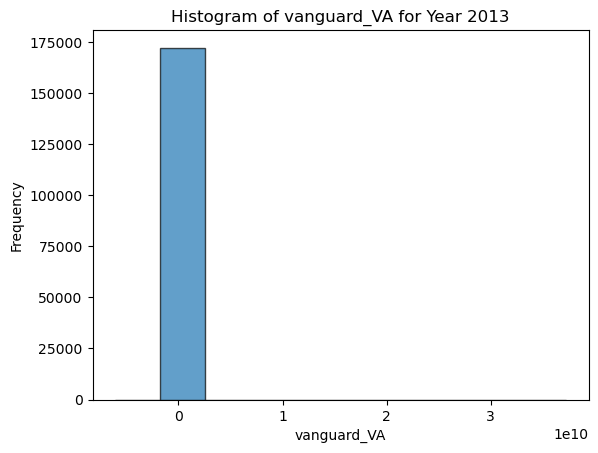

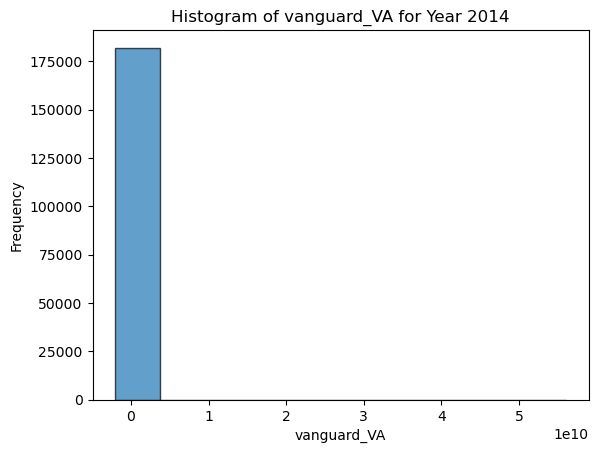

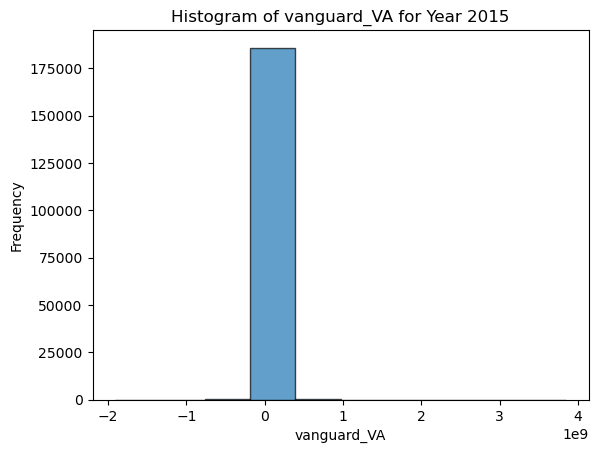

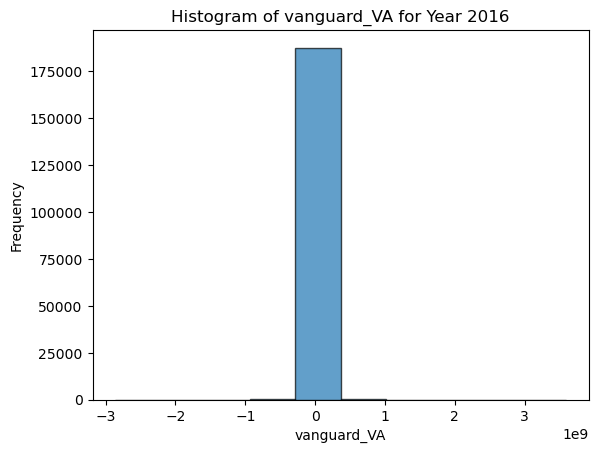

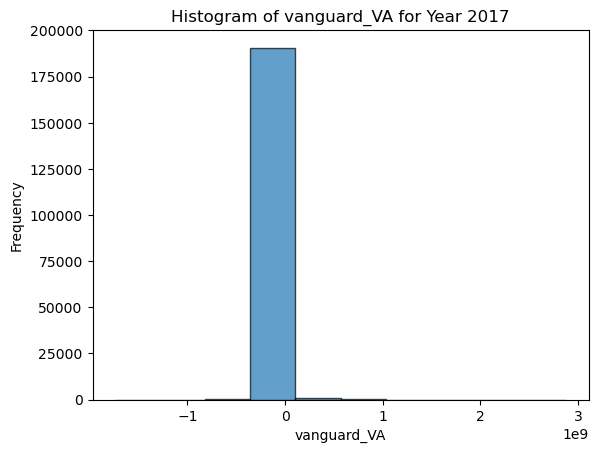

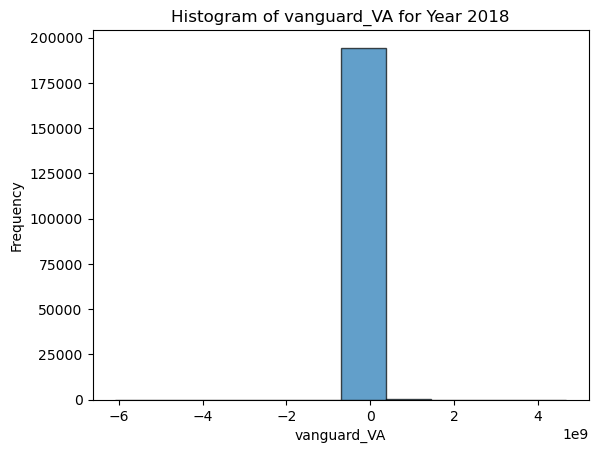

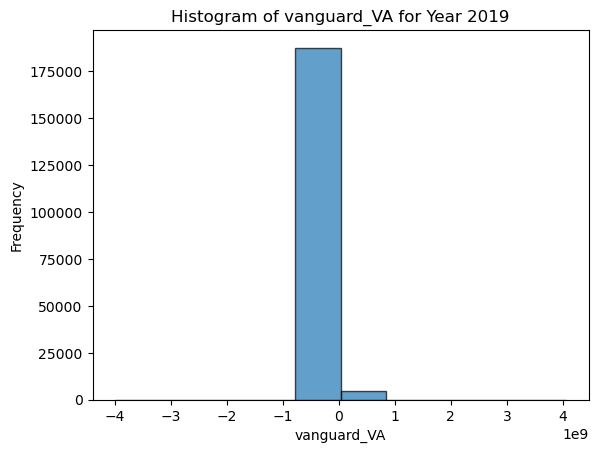

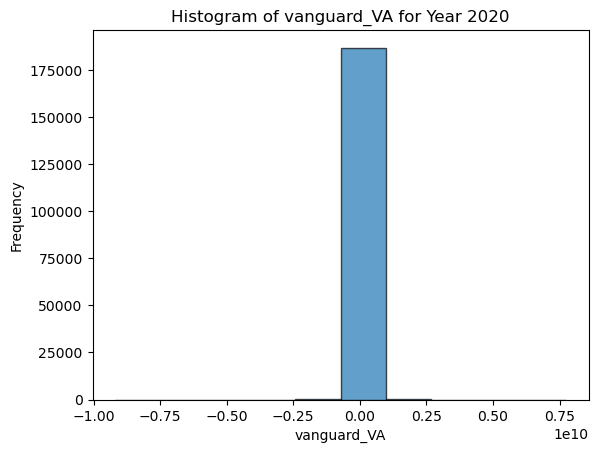

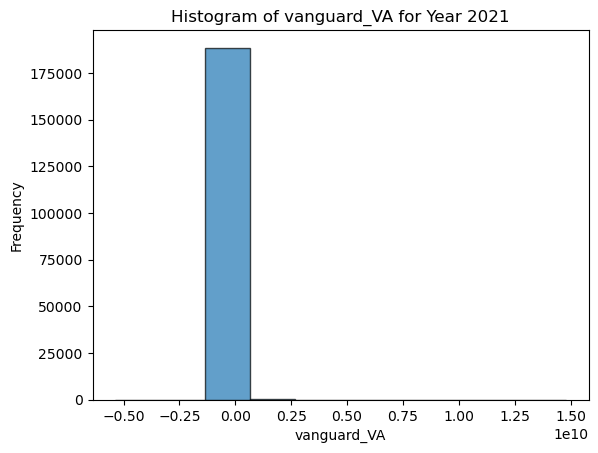

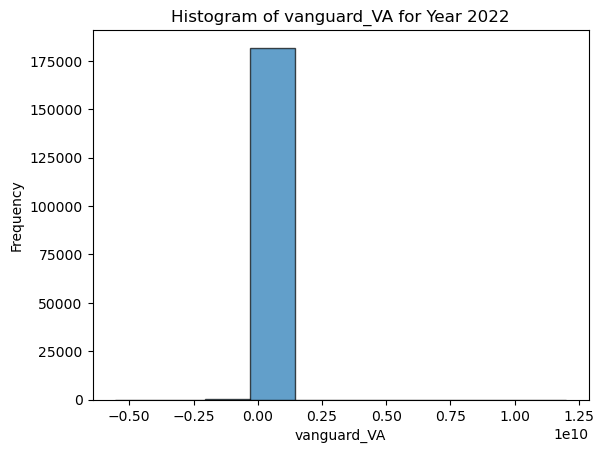

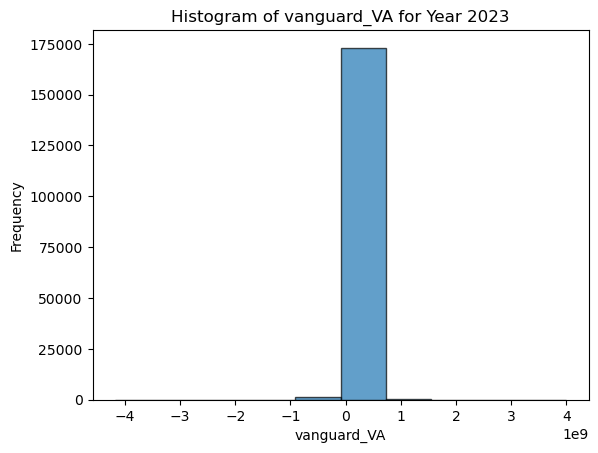

In [14]:
grouped = df_merged.groupby('year')

for year, group in grouped:
    plt.figure()
    plt.hist(group['vanguard_VA'], edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of vanguard_VA for Year {year}')
    plt.xlabel('vanguard_VA')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

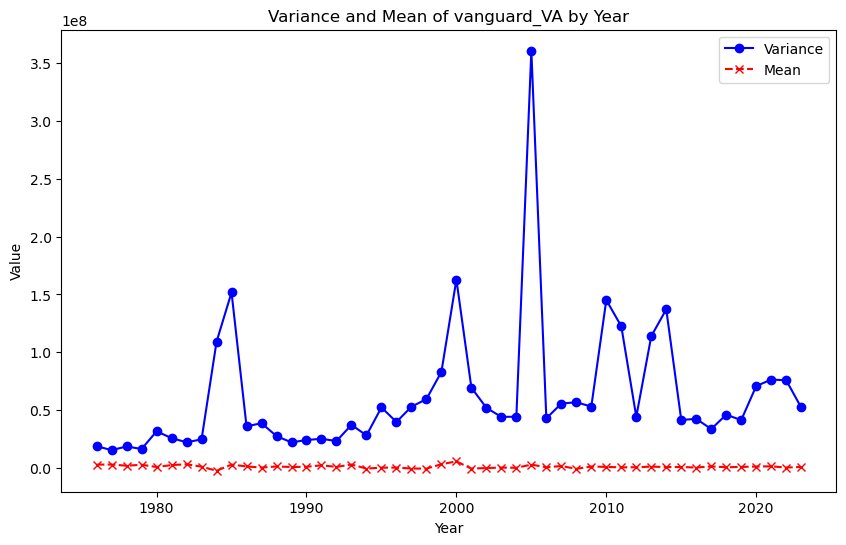

In [15]:
variance_per_year = df_merged.groupby('year')['vanguard_VA'].std().reset_index()
mean_per_year = df_merged.groupby('year')['vanguard_VA'].mean().reset_index()

# Rename columns for clarity
variance_per_year.columns = ['year', 'vanguard_VA_variance']
mean_per_year.columns = ['year', 'vanguard_VA_mean']

# Plot the variance and mean by year
plt.figure(figsize=(10, 6))

# Plot variance
plt.plot(variance_per_year['year'], variance_per_year['vanguard_VA_variance'], marker='o', linestyle='-', color='b', label='Variance')

# Plot mean
plt.plot(mean_per_year['year'], mean_per_year['vanguard_VA_mean'], marker='x', linestyle='--', color='r', label='Mean')

plt.title('Variance and Mean of vanguard_VA by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(False)
plt.show()

In [16]:
variance_per_year

year  vanguard_VA_variance
0   1976          1.865514e+07
1   1977          1.535695e+07
2   1978          1.845301e+07
3   1979          1.631839e+07
4   1980          3.159409e+07
5   1981          2.570673e+07
6   1982          2.210360e+07
7   1983          2.463687e+07
8   1984          1.091059e+08
9   1985          1.517552e+08
10  1986          3.587025e+07
11  1987          3.862373e+07
12  1988          2.742855e+07
13  1989          2.200502e+07
14  1990          2.408809e+07
15  1991          2.510879e+07
16  1992          2.317252e+07
17  1993          3.717462e+07
18  1994          2.805850e+07
19  1995          5.226493e+07
20  1996          3.965281e+07
21  1997          5.289925e+07
22  1998          5.940733e+07
23  1999          8.300939e+07
24  2000          1.628608e+08
25  2001          6.935858e+07
26  2002          5.192386e+07
27  2003          4.403569e+07
28  2004          4.425325e+07
29  2005          3.608294e+08
30  2006          4.279330e+07
31  2007          5.562539e+07
32  2008          5.671320e+07
33  2009          5.301234e+07
34  2010          1.451094e+08
35  2011          1.224727e+08
36  2012          4.417327e+07
37  2013          1.139056e+08
38  2014          1.370911e+08
39  2015          4.141863e+07
40  2016          4.237327e+07
41  2017          3.357113e+07
42  2018          4.598867e+07
43  2019          4.127752e+07
44  2020          7.071099e+07
45  2021          7.633116e+07
46  2022          7.577410e+07
47  2023          5.224686e+07